# Call Center Sentiment Sample Data

# 1. Loading the Calls Center Data

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
calls=pd.read_excel('Call-Center.xlsx') #loading the call center data
calls

,ID,Customer Name,Sentiment,CSAT Score,Call Timestamp,Reason,City,State,Channel,Response Time,Call Duration (Minutes),Call Center
0,PIS-39858047,Frances Gullefant,Neutral,8,2024-01-01,Billing Question,Charleston,West Virginia,Chatbot,Within SLA,14,Chicago/IL
1,ROH-40287216,Harcourt Zoanetti,Negative,5,2024-01-01,Billing Question,Honolulu,Hawaii,Call-Center,Within SLA,32,Los Angeles/CA
2,NKC-39578431,Washington Oxteby,Negative,3,2024-01-02,Billing Question,Dallas,Texas,Chatbot,Within SLA,6,Denver/CO
3,APY-17008648,Rafe Duffitt,Very Negative,4,2024-01-02,Billing Question,Fort Myers,Florida,Email,Below SLA,26,Los Angeles/CA
4,MHK-38443501,Tris Bent,Positive,8,2024-01-02,Billing Question,Tuscaloosa,Alabama,Web,Within SLA,26,Los Angeles/CA
...,...,...,...,...,...,...,...,...,...,...,...,...
65,JCE-87896568,Llewellyn Pablos,Very Positive,9,2024-01-29,Payments,Lubbock,Texas,Call-Center,Within SLA,33,Los Angeles/CA
66,GZL-83273642,Lurleen Swadden,Neutral,8,2024-01-30,Payments,Chicago,Illinois,Call-Center,Within SLA,8,Baltimore/MD
67,YHK-31842577,Ardith Bunting,Negative,3,2024-01-30,Billing Question,Columbus,Ohio,Web,Within SLA,19,Baltimore/MD
68,BGA-81071725,Wylie Gramer,Negative,3,2024-01-31,Billing Question,Columbus,Georgia,Web,Within SLA,23,Los Angeles/CA


# 2. Extracting call center meta data


In [10]:
calls.shape #returns 70 rows and 12 columns

(70, 12)

In [78]:
calls.info() #displays all the columns data types and null values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       70 non-null     object        
 1   Customer Name            70 non-null     object        
 2   Sentiment                70 non-null     object        
 3   CSAT Score               70 non-null     int64         
 4   Call Timestamp           70 non-null     datetime64[ns]
 5   Reason                   70 non-null     object        
 6   City                     70 non-null     object        
 7   State                    70 non-null     object        
 8   Channel                  70 non-null     object        
 9   Response Time            70 non-null     object        
 10  Call Duration (Minutes)  70 non-null     int64         
 11  Call Center              70 non-null     object        
dtypes: datetime64[ns](1), int64(2), object

In [14]:
calls.describe() #displays a summary of all numericaal columns in calls center dataset

,CSAT Score,Call Timestamp,Call Duration (Minutes)
count,70.000000,70,70.000000
mean,5.328571,2024-01-16 08:34:17.142857216,26.257143
min,1.000000,2024-01-01 00:00:00,6.000000
25%,3.000000,2024-01-08 00:00:00,14.000000
50%,5.000000,2024-01-16 12:00:00,29.500000
75%,7.000000,2024-01-24 00:00:00,36.000000
max,10.000000,2024-01-31 00:00:00,45.000000
std,2.387901,NaN,12.576359


In [325]:
len(calls) #returns all rows in the call center dataset

70

In [326]:
calls.columns.to_list() #returns all columns in the dataset presented as a column list

['ID',
 'Customer Name',
 'Sentiment',
 'CSAT Score',
 'Call Timestamp',
 'Reason',
 'City',
 'State',
 'Channel',
 'Response Time',
 'Call Duration (Minutes)',
 'Call Center']

# 3. Finding different totals from call center sentiment dataset

In [29]:
total_customers=calls['Customer Name'].value_counts().sum() #counts all distinct customers then sums the up
print(f"The total customers are: {total_customers}")

The total customers are: 70


In [31]:
total_sentiments=calls['Sentiment'].value_counts() #counts all distinct sentiments
total_sentiments

Sentiment
Negative         29
Very Negative    15
Positive         10
Neutral           9
Very Positive     7
Name: count, dtype: int64

In [98]:
call_reasons=calls['Reason'].nunique() #counts the total call reasons
print(f"The call reasons are: {call_reasons}")

The total call reasons are: 3


In [105]:
total_call_reasons=calls['Reason'].value_counts().sum() #returns the sum of all call reasons cummulatively
print(f"The sum of all call reasons is: {total_call_reasons}")

The sum of all call reasons is: 70


In [45]:
total_cities=calls['City'].nunique() #outputs all the total cities represented
print(f"The total cities represented are: {total_cities}")

The total cities represented are: 57


In [48]:
total_states=calls['State'].nunique() #retuurns all the states served by the call center
print(f"Total states represented are: {total_states}")

Total states represented are: 29


In [51]:
total_channels=calls['Channel'].nunique() #returns all the channels used in the call centers
print(f"Total channels used are: {total_channels}")

Total channels used are: 4


In [60]:
total_call_time=calls['Call Duration (Minutes)'].sum() #returns the different channels used
print(f"Total call time in minutes is: {total_call_time}")

Total call time in minutes is: 1838


In [81]:
avg_response_time=calls['Response Time'].value_counts().mean().round() #returns the average response time rounded to the nearest minute
print(f"The average response time is: {avg_response_time} minutes")

The average response time is: 23.0 minutes


# 4. Outputing related data from call sentiment dataset

In [291]:
cust_sentiments=calls.groupby('Sentiment')['Customer Name'].nunique().sort_values(ascending=False) #returns the total customers per sentiment
cust_sentiments

Sentiment
Negative         29
Very Negative    15
Positive         10
Neutral           9
Very Positive     7
Name: Customer Name, dtype: int64

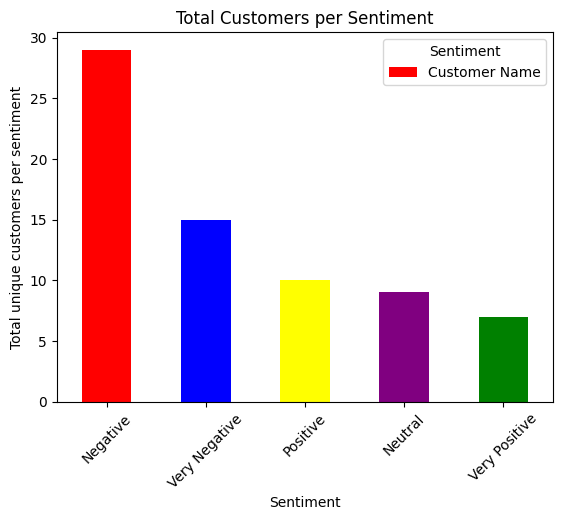

In [350]:
cust_sentiments.plot(kind='bar',
                     xlabel = "Sentiment",
                     ylabel="Total unique customers per sentiment",
                     title="Total Customers per Sentiment",
                     color=("red",'blue','yellow','purple','green','black'),
                     )
plt.xticks(rotation=45)
plt.legend(title=('Sentiment'),loc='upper right')
plt.show() 

In [92]:
cust_reasons=calls['Reason'].value_counts() #returns the total customers by reason
cust_reasons

Reason
Billing Question    50
Payments            12
Service Outage       8
Name: count, dtype: int64

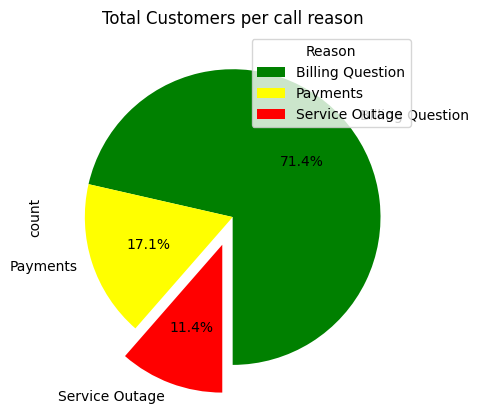

In [416]:
cust_reasons.plot(kind='pie',
                  title='Total Customers per call reason',
                  colors=('green','yellow','red'),
                  autopct='%0.01f%%',
                  explode=(0,0,0.2) ,
                  startangle=-90
                 )
plt.legend(title='Reason',loc='upper right')
plt.show()

In [130]:
state_cust=calls['State'].value_counts().head(5) #returns the top 5 states with the most customers
state_cust

State
Texas           9
California      9
Florida         7
Illinois        5
Pennsylvania    4
Name: count, dtype: int64

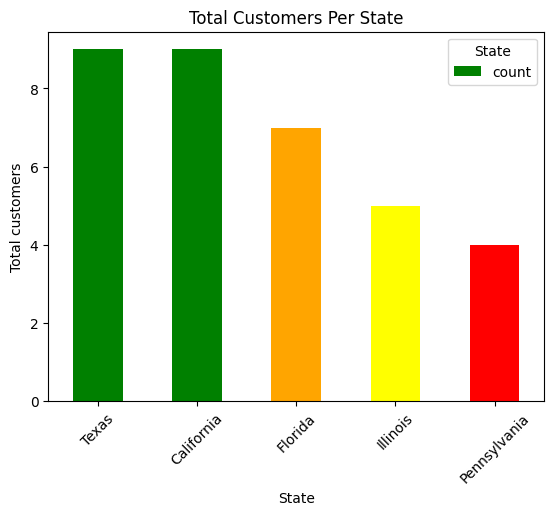

In [363]:
state_cust.plot(kind='bar',
                xlabel='State',
                ylabel='Total customers',
                color=('green','green','orange','yellow','red'),
                title='Total Customers Per State'
                )
plt.legend(title='State', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [366]:
city_cust=calls['City'].value_counts().head(5) #returns the top 5 cities with the most customers
city_cust

City
Minneapolis    3
Fort Myers     2
Little Rock    2
Lubbock        2
Fort Pierce    2
Name: count, dtype: int64

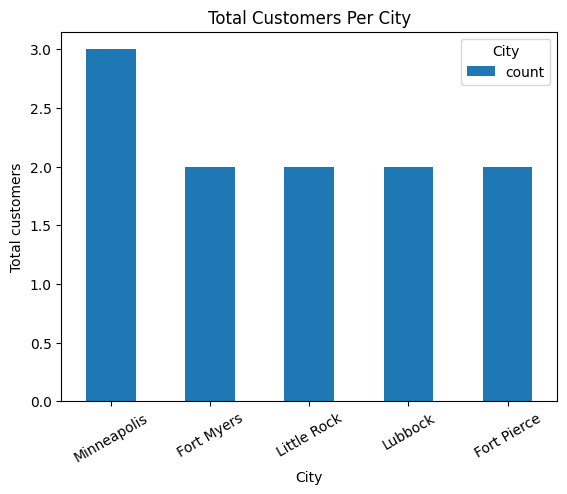

In [375]:
city_cust.plot(kind='bar',
               xlabel='City',
               ylabel='Total customers',
               title='Total Customers Per City'
               )
plt.legend(title='City',loc="upper right")
plt.xticks(rotation=30)
plt.show()

In [138]:
cust_channel=calls['Channel'].value_counts().sort_values(ascending=False) #returns total customers per channel in an ascending order
cust_channel

Channel
Call-Center    23
Chatbot        22
Web            17
Email           8
Name: count, dtype: int64

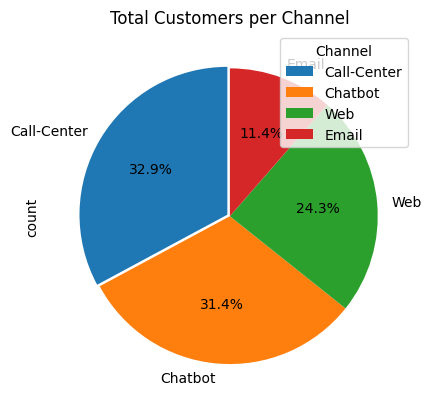

In [413]:
cust_channel.plot(kind='pie',
                  title='Total Customers per Channel',
                  autopct='%0.01f%%',
                  explode=(0.02,0,0,0),
                  startangle=90
                 )
plt.legend(title='Channel',loc='upper right')
plt.show()                  

In [152]:
cust_duration=calls.groupby('Customer Name')['Call Duration (Minutes)'].sum().sort_values(ascending=False).head(5) #returns top 5 customers with longest call duration
cust_duration

Customer Name
Cora Buggs         45
Giralda Gebby      44
Julee O'Gavin      44
Lillis Dewhurst    44
Lindsay Bubb       43
Name: Call Duration (Minutes), dtype: int64

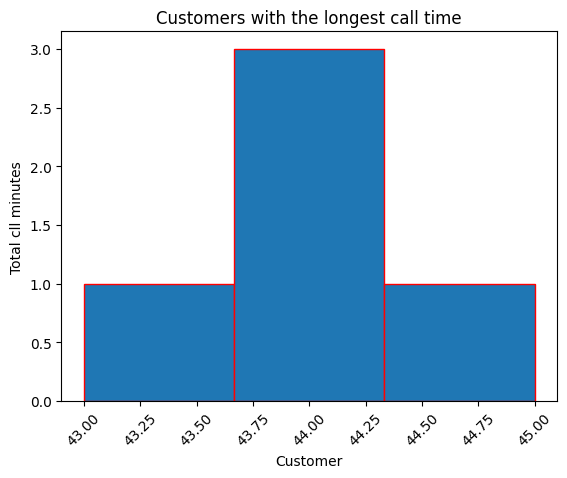

In [391]:
cust_duration.plot(kind='hist',
                   bins=3,
                   title='Customers with the longest call time',
                   xlabel='Customer',
                   ylabel='Total cll minutes',
                   edgecolor ='red',
                   )
plt.xticks(rotation=45)
plt.show()

In [159]:
cust_call_cntr=calls.groupby('Call Center')['ID'].nunique().sort_values(ascending=False) #returns the total customers served by each call center
cust_call_cntr

Call Center
Los Angeles/CA    30
Baltimore/MD      27
Chicago/IL         7
Denver/CO          6
Name: ID, dtype: int64

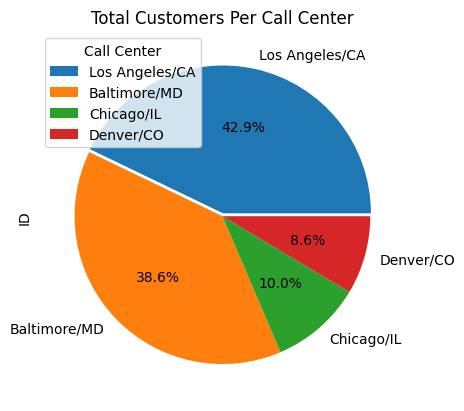

In [412]:
cust_call_cntr.plot.pie(title='Total Customers Per Call Center',
                        autopct='%0.01f%%',
                        explode=(0.02,0,0,0),
                        startangle=0
                       )
plt.legend(title='Call Center',loc='upper left')
plt.show()

In [163]:
sentiment_duration=calls.groupby('Sentiment')['Call Duration (Minutes)'].sum().sort_values(ascending=False) #returns total time duration per sentiment type
sentiment_duration

Sentiment
Negative         803
Very Negative    437
Positive         245
Neutral          184
Very Positive    169
Name: Call Duration (Minutes), dtype: int64

In [176]:
cust_timestamp=calls.groupby('Call Timestamp')['Customer Name'].nunique() #total customers per time stamp
cust_timestamp

Call Timestamp
2024-01-01    2
2024-01-02    3
2024-01-03    2
2024-01-04    2
2024-01-05    2
2024-01-06    2
2024-01-07    2
2024-01-08    4
2024-01-09    2
2024-01-10    2
2024-01-11    2
2024-01-12    2
2024-01-13    2
2024-01-14    2
2024-01-15    2
2024-01-16    2
2024-01-17    2
2024-01-18    2
2024-01-19    2
2024-01-20    2
2024-01-21    2
2024-01-22    2
2024-01-23    2
2024-01-24    4
2024-01-25    2
2024-01-26    2
2024-01-27    2
2024-01-28    2
2024-01-29    5
2024-01-30    2
2024-01-31    2
Name: Customer Name, dtype: int64

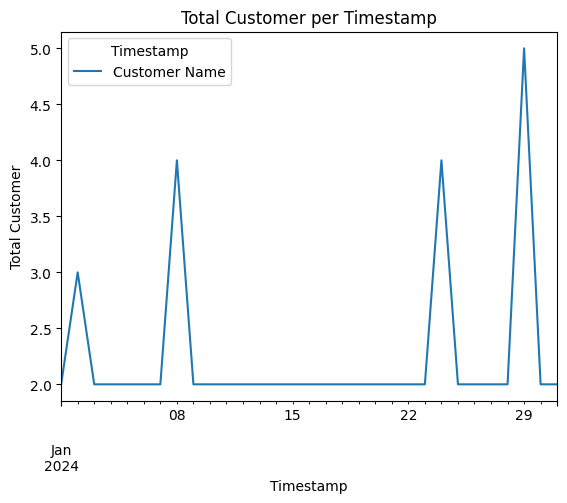

In [401]:
cust_timestamp.plot(kind='line',
                    title='Total Customer per Timestamp',
                    xlabel='Timestamp',
                    ylabel='Total Customer',
                   )
plt.legend(title='Timestamp',loc='upper left')
plt.show()

In [408]:
cust_csatscore=calls.groupby('CSAT Score')['Customer Name'].nunique().sort_values(ascending=False) #returns total customers per CSAT Score!
cust_csatscore

CSAT Score
3     15
4     12
6      8
8      7
7      7
5      7
9      6
2      3
10     3
1      2
Name: Customer Name, dtype: int64

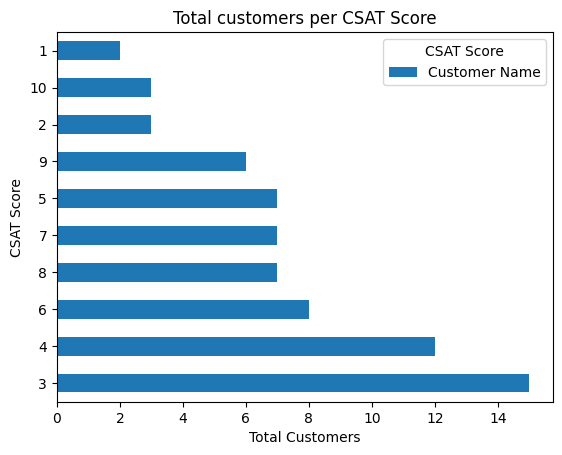

In [409]:
cust_csatscore.plot(kind='barh',
                    stacked=True,
                    title='Total customers per CSAT Score',
                    xlabel='Total Customers',
                    ylabel='CSAT Score'
                   )
plt.legend(title='CSAT Score',loc='upper right')
plt.show()

In [191]:
sent_channel=calls.groupby('Channel')['Sentiment'].nunique().sort_values(ascending=False) #returns total sentiments per different channels
sent_channel

Channel
Call-Center    5
Chatbot        5
Web            5
Email          4
Name: Sentiment, dtype: int64

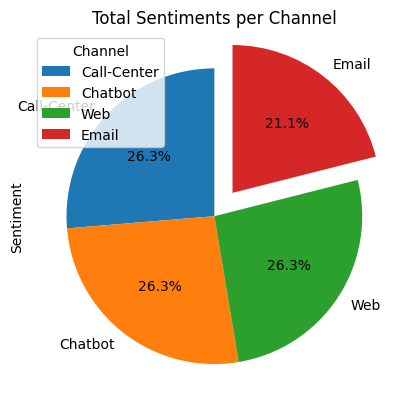

In [411]:
sent_channel.plot(kind='pie',
                  title='Total Sentiments per Channel',
                  autopct='%0.1f%%',
                  explode=(0,0,0,0.2),
                  startangle=90
                 )
plt.legend(title='Channel',loc='upper left')
plt.show()

In [193]:
call_cntr_response_time=calls.groupby('Call Center')['Response Time'].nunique() #returns total response times per call center
call_cntr_response_time

Call Center
Baltimore/MD      3
Chicago/IL        3
Denver/CO         2
Los Angeles/CA    2
Name: Response Time, dtype: int64

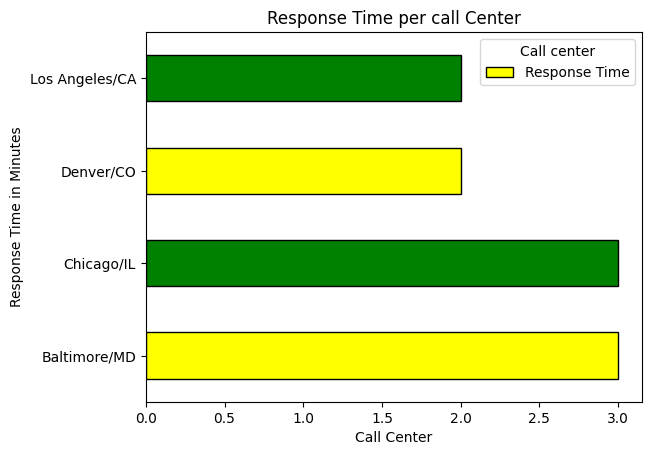

In [423]:
call_cntr_response_time.plot(kind='barh',
                             title='Response Time per call Center',
                             xlabel='Call Center',
                             ylabel='Response Time in Minutes',
                             edgecolor='black',
                            color=('yellow','green')
                            )
plt.legend(title='Call center',loc='upper right')
plt.show()

In [199]:
channel_call_duration=calls.groupby('Channel')['Call Duration (Minutes)'].sum().sort_values(ascending=False)
channel_call_duration

Channel
Chatbot        641
Call-Center    557
Web            417
Email          223
Name: Call Duration (Minutes), dtype: int64

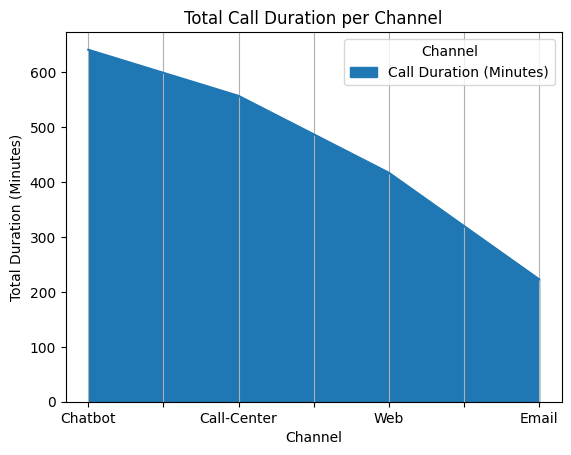

In [431]:
channel_call_duration.plot(kind='area',
                           title='Total Call Duration per Channel',
                           xlabel='Channel',
                           ylabel='Total Duration (Minutes)',
                           )
plt.legend(title='Channel',loc='upper right')
plt.grid(axis='x')
plt.show()

# By His Grace I have completed project two